# Classifying Electrocardiograms

##  Electrocardiograms

## Imports

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,learning_curve,cross_validate,train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_csv("data/electrocardiograms.csv")
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,0.511236,0.520599,0.548689,0.599251,0.606742,0.640449,0.664794,0.730337,0.780899,0.852060,0.897004,0.953184,0.970037,1.000000,0.992509,0.985019,0.943820,0.898876,0.823970,0.752809,0.711610,0.666667,0.602996,0.576779,0.597378,0.670412,0.595506,0.513109,0.423221,0.277154,0.119850,0.082397,0.022472,0.039326,0.054307,0.063670,0.198502,0.303371,0.355805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,0.308929,0.305357,0.291071,0.285714,0.283929,0.271429,0.255357,0.264286,0.260714,0.251786,0.241071,0.226786,0.217857,0.200000,0.173214,0.164286,0.160714,0.155357,0.141071,0.144643,0.155357,0.167857,0.175000,0.192857,0.223214,0.251786,0.255357,0.276786,0.310714,0.323214,0.323214,0.326786,0.342857,0.346429,0.339286,0.342857,0.348214,0.346429,0.335714,0.335714,0.339286,0.341071,0.342857,0.357143,0.358929,0.328571,0.308929,0.360714,0.455357,0.457143,0.366071,0.205357,0.114286,0.048214,0.000000,0.041071,0.101786,0.146429,0.187500,0.246429,0.301786,0.351786,0.382143,0.387500,0.398214,0.407143,0.407143,0.410714,0.421429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

## Data Exploration

In [3]:
disease_x = np.where(data["target"]==1)[0][0]
disease_x

0

In [4]:
no_disease_idx = np.where(data["target"]==0)[0][0]
no_disease_idx

1448

In [5]:
count_targets = list(data.target.value_counts())
print(count_targets)
at_risk_count = count_targets[-1]
at_risk_count

[18117, 1448]


1448

In [6]:
healthy_count = count_targets[0]
healthy_count

18117

##  Logistic Regression

In [7]:
X = data.drop(columns=["target"])
y = data["target"]
log_model = LogisticRegression(max_iter=1000)
cv_result = cross_validate(log_model, X, y, cv=5, scoring=[
    "accuracy",
    "recall",
    "precision",
    "f1"  
])
pd.DataFrame(cv_result)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.847937,0.024997,0.938922,0.296552,0.710744,0.418491
1,0.794001,0.022996,0.938922,0.355172,0.664516,0.462921
2,0.778004,0.023008,0.939944,0.362069,0.677419,0.471910
3,0.654001,0.025006,0.938410,0.328720,0.669014,0.440835
4,0.646990,0.024002,0.939688,0.307958,0.712000,0.429952


In [8]:
correct_pred_ratio = cv_result["test_accuracy"].mean()
correct_pred_ratio

0.9391771019677997

In [9]:
flag_ratio = cv_result["test_recall"].mean()
flag_ratio

0.3300942608280635

In [10]:
correct_detection_ratio = cv_result["test_precision"].mean()
correct_detection_ratio

0.6867386740061804

In [11]:
aggregated_metric = cv_result["test_f1"].mean()
aggregated_metric

0.44482198050033483

## Confusion Matrix

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

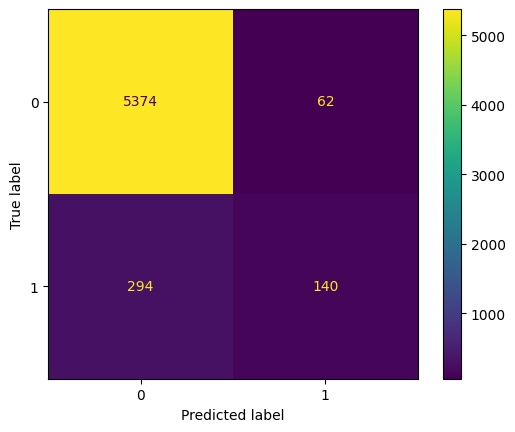

In [14]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=log_model.classes_).plot();

## KNN Classifier

In [15]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

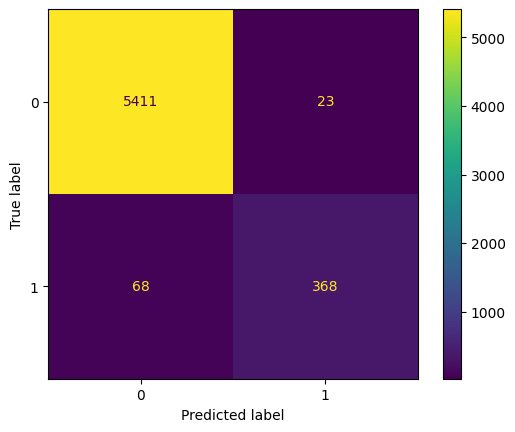

In [16]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=knn.classes_).plot();

## Classification Report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5434
           1       0.94      0.84      0.89       436

    accuracy                           0.98      5870
   macro avg       0.96      0.92      0.94      5870
weighted avg       0.98      0.98      0.98      5870



In [18]:
class_report= classification_report(y_test, y_pred, output_dict=True)
correct_at_risk_predictions = class_report["1"]["precision"]
correct_at_risk_predictions

0.9411764705882353

## Prediction

In [19]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,0.321995,0.192744,0.147392,0.129252,0.099773,0.092971,0.068027,0.068027,0.061224,0.040816,0.034014,0.027211,0.013605,0.00907,0.0,0.006803,0.0,0.011338,0.015873,0.031746,0.054422,0.092971,0.113379,0.160998,0.185941,0.208617,0.219955,0.240363,0.231293,0.226757,0.231293,0.238095,0.235828,0.235828,0.24263,0.249433,0.253968,0.258503,0.258503,0.256236,0.253968,0.265306,0.263039,0.272109,0.265306,0.260771,0.263039,0.267574,0.267574,0.274376,0.258503,0.265306,0.263039,0.267574,0.272109,0.263039,0.260771,0.274376,0.269841,0.274376,0.276644,0.269841,0.267574,0.274376,0.292517,0.303855,0.321995,0.337868,0.337868,0.340136,0.319728,0.297052,0.285714,0.269841,0.269841,0.274376,0.269841,0.274376,0.267574,0.260771,0.371882,0.639456,0.959184,0.807256,0.444444,0.29932,0.272109,0.278912,0.253968,0.258503,0.251701,0.256236,0.247166,0.265306,0.265306,0.267574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
knn_pred = knn.predict(new_patient)
prediction = "at risk" if knn_pred[0] == 1 else "healthy"

In [21]:
prediction

'at risk'